# 패션 아이템 다중 분류 모델 설계

## 전처리

In [6]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
# 데이터 형상 출력
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [24]:
# 아이템 이름 출력
print(train_labels[0])
print(class_names[train_labels[0]])

9
Ankle boot


(28, 28)


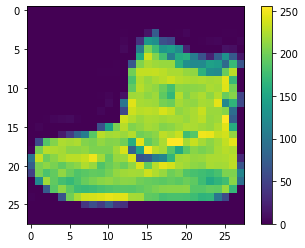

In [25]:
# 이미지 시각화
import matplotlib.pyplot as plt
print(train_images[0].shape)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 신경망 모델 구성

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28))) # 28x28 입력 이미지를 직렬화하는 층
model.add(layers.Dense(512, activation='relu')) # Dense : 완전연결층
model.add(layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


* Hidden layer : 401920 = 512 * 784 +512
* Output layer : 5130 = 10 * 512 + 10

In [32]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 학습

In [34]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 87us/step - loss: 16.3351 - accuracy: 0.7276 - val_loss: 0.8849 - val_accuracy: 0.7643
Epoch 2/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.7328 - accuracy: 0.8050 - val_loss: 0.5975 - val_accuracy: 0.8159
Epoch 3/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.6141 - accuracy: 0.8261 - val_loss: 0.7118 - val_accuracy: 0.8187
Epoch 4/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.5763 - accuracy: 0.8361 - val_loss: 0.6660 - val_accuracy: 0.8171
Epoch 5/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.5391 - accuracy: 0.8425 - val_loss: 0.8927 - val_accuracy: 0.7756
Epoch 6/30
60000/60000 [==============================] - 5s 85us/step - loss: 0.5446 - accuracy: 0.8488 - val_loss: 0.5967 - val_accuracy: 0.8396
Epoch 7/30
60000/60000 [==============================] - 5s 84us/s

## 결과 시각화

In [41]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

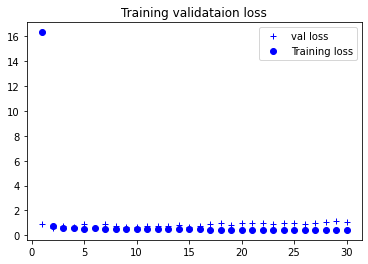

In [43]:
plt.plot(range(1,31), val_loss, 'b+',label='val loss')
plt.plot(range(1,31), loss, 'bo',label='Training loss')
plt.title('Training validataion loss')
plt.legend()

plt.show()

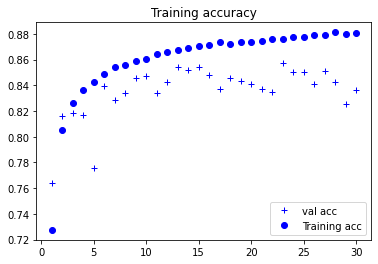

In [44]:
plt.plot(range(1,31), val_acc, 'b+',label='val acc')
plt.plot(range(1,31), acc, 'bo',label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.show()

## 성능 평가

In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 60us/step


In [59]:
import numpy as np

print('테스트 세트 정확도 %f' % np.round(test_acc*100,2))

테스트 세트 정확도 83.630000


In [48]:
def predict_test_data(index):
    predict = model.predict(test_images[index].reshape((1,28,28)))
    print('predict probability', np.round(predict, 2))
    print('predict class', class_names[np.argmax(predict)])

In [49]:
def show_test_data(index):
    plt.figure()
    plt.imshow(test_images[index].reshape(28, 28))
    plt.colorbar()
    plt.grid(False)
    plt.show()

predict probability [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
predict class Ankle boot


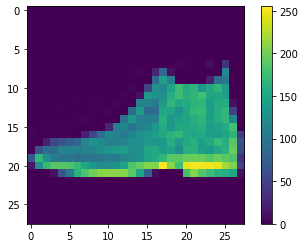

In [56]:
predict_test_data(0)
show_test_data(0)

predict probability [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
predict class Trouser


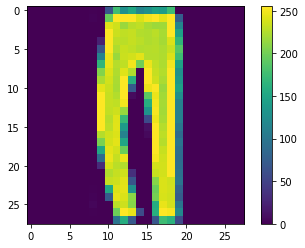

predict probability [[0.   0.   0.   0.   0.01 0.   0.99 0.   0.   0.  ]]
predict class Shirt


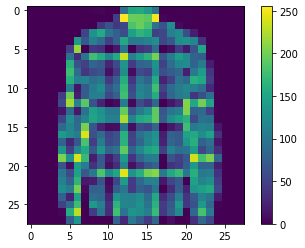

predict probability [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
predict class Sandal


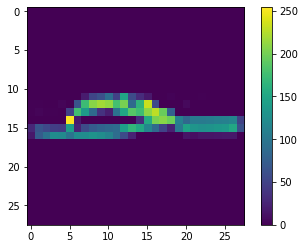

predict probability [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
predict class Dress


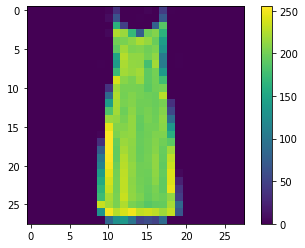

predict probability [[0.   0.   0.01 0.   0.92 0.   0.07 0.   0.   0.  ]]
predict class Coat


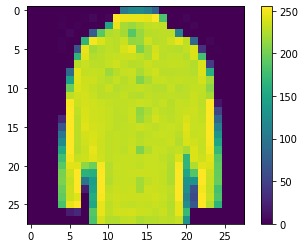

predict probability [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
predict class Bag


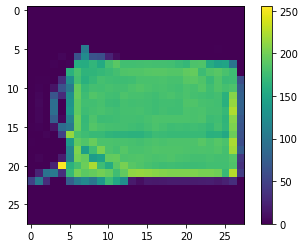

In [55]:
target = [2,7,8,13,14,18]
for i in target:
    predict_test_data(i)
    show_test_data(i)